In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack

from scipy import stats
import tensorflow as tf
import tensorflow_datasets as tfds
import keras_tuner as kt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

2025-04-03 15:08:33.288109: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 15:08:33.294042: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 15:08:33.311451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743707313.339640   44537 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743707313.348257   44537 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743707313.369831   44537 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

### Import data

In [4]:
fits_file_2384a = '/work/mccleary_group/saha/data/Abell2384a/sextractor_dualmode/out/Abell2384a_colors_mags.fits'
hdul_2384a = fits.open(fits_file_2384a)
data_2384a = Table(hdul_2384a[1].data)

fits_file_2384b = '/work/mccleary_group/saha/data/Abell2384b/sextractor_dualmode/out/Abell2384b_colors_mags.fits'
hdul_2384b = fits.open(fits_file_2384b)
data_2384b = Table(hdul_2384b[1].data)

fits_file_3667 = '/work/mccleary_group/saha/data/Abell3667/sextractor_dualmode/out/Abell3667_colors_mags.fits'
hdul_3667 = fits.open(fits_file_3667)
data_3667 = Table(hdul_3667[1].data)

fits_file_3571 = '/work/mccleary_group/saha/data/Abell3571/sextractor_dualmode/out/Abell3571_colors_mags.fits'
hdul_3571 = fits.open(fits_file_3571)
data_3571 = Table(hdul_3571[1].data)

fits_file_3827 = '/work/mccleary_group/saha/data/Abell3827/sextractor_dualmode/out/Abell3827_colors_mags.fits'
hdul_3827 = fits.open(fits_file_3827)
data_3827 = Table(hdul_3827[1].data)

data = vstack([data_2384a, data_2384b, data_3667, data_3571, data_3827])


data_z = data[~np.isnan(np.array(data['redshift']))]
x_cols = ['m_b', 'm_g', 'm_u', 'R_b', 'R_g',  'R_u']

x = np.array([data_z[x_cols[i]] for i in range(len(x_cols))]).T
y = np.array([data_z['redshift']]).T

### Import model

In [2]:
path = '/home/habjan.e/SuperBIT_code/Redshift_ml/mlp_redshifts/mlp_redshift.keras'

check_model = tf.keras.models.load_model(path)

2025-04-03 15:09:15.878224: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Compare true and predicted redshifts

389/389 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


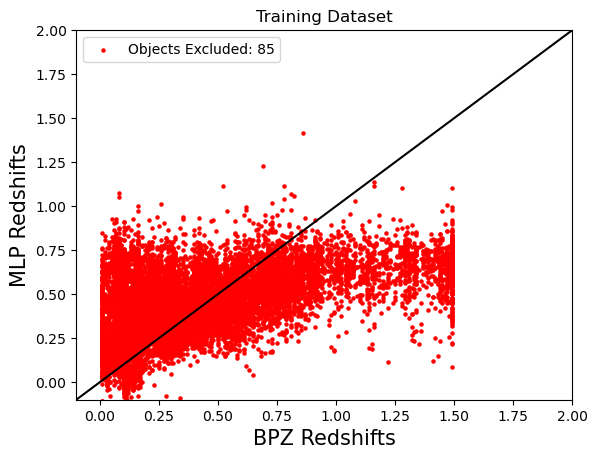

In [5]:
model_out = check_model.predict(x)

plot_bool = (model_out > 0 ) & (model_out < 5)

ob_excluded = len(np.where(~plot_bool)[0])

plt.scatter(y, model_out, c='r', label = f'Objects Excluded: {ob_excluded}', s=5)

mod_min = np.min(model_out[plot_bool])
mod_max = np.max(model_out[plot_bool])
line = np.linspace(mod_min - 5, mod_max + 5, 100)
plt.plot(line, line, c='k')

plt.xlim(-0.1, 2)
plt.ylim(-0.1, 2)

plt.title('Training Dataset')
plt.xlabel('BPZ Redshifts', fontsize = 15)
plt.ylabel('MLP Redshifts', fontsize = 15)

plt.legend()